In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_iris
%matplotlib inline

### iris dataset from sklearn.datasets

In [123]:
#object of dataset
iris=load_iris()

In [124]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [125]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [126]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [127]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [128]:
df['target']=iris.target

In [129]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [130]:
# mapping target name with the dataframe on the basis of target column
df['target_name']=list(map(lambda x:iris.target_names[x],df['target']))

In [131]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [132]:
#df=df.drop(['petal length (cm)','petal width (cm)'],axis=1)

In [133]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

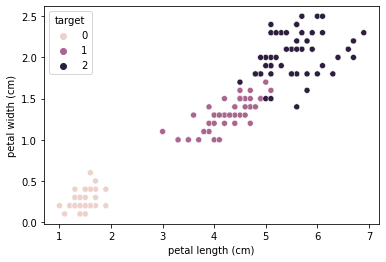

In [134]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df.target)

### Scaling the feature in given range(0,1)


In [135]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()

In [136]:
scl.fit(df[['petal width (cm)']])
df['petal width (cm)']=scl.transform(df[['petal width (cm)']])

In [137]:
scl.fit(df[['petal length (cm)']])
df['petal length (cm)']=scl.transform(df[['petal length (cm)']])

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

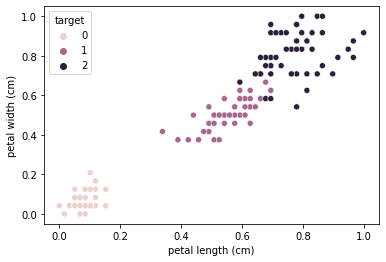

In [138]:
# scatter plot after scaling
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df.target)

## KMeans

In [139]:
from sklearn.cluster import KMeans

In [140]:
km=KMeans(n_clusters=3)

In [141]:
pre=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [142]:
df['predicted']=pre

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

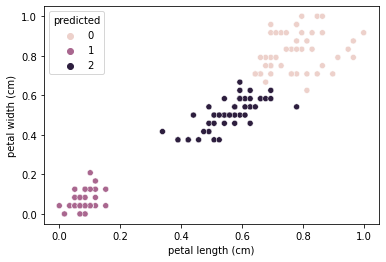

In [143]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df.predicted)


### Centers of k clusters

In [144]:
cen=km.cluster_centers_
cen

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

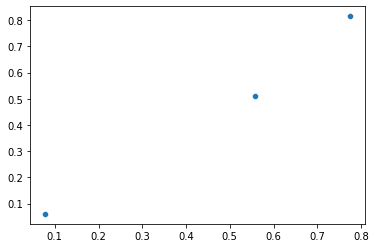

In [145]:
sns.scatterplot(cen[:,0],cen[:,1])

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

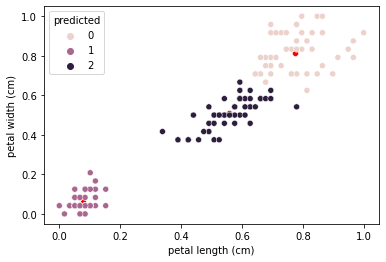

In [146]:
fig,ax=plt.subplots()
sns.scatterplot(cen[:,0],cen[:,1],ax=ax,markers='*',color='red')
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df.predicted,ax=ax)

# Elbow plot

In [147]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'k value'), Text(0, 0.5, 'sum of squared error')]

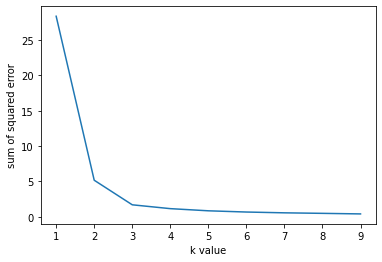

In [148]:
st=sns.lineplot(range(1,10),sse)
st.set(xlabel='k value',ylabel='sum of squared error')